INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


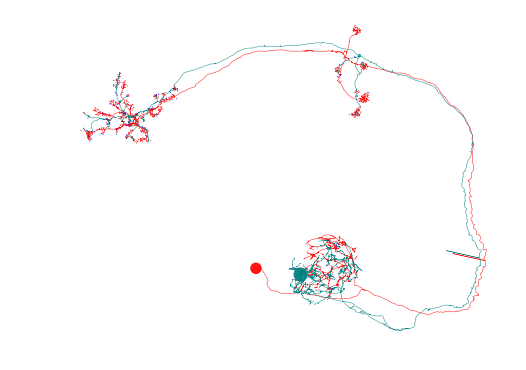

In [5]:
import pymaid
import matplotlib.pyplot as plt

# Connect to CATMAID
rm = pymaid.CatmaidInstance( 'www.your.catmaid-server.org',
                             'HTTP_USER' ,
                             'HTTP_PASSWORD',
                             'TOKEN' )

# Initialize neurons with just a skeleton ID 
# Alternatively, use pymaid.get_neurons()
nl = pymaid.CatmaidNeuronList(['57311','27295'])

# Plot using standard parameters
fig, ax = nl.plot2d()
plt.show()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


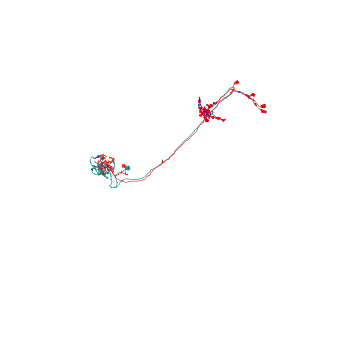

In [6]:
# Plot using matplotlib's 3D functions
fig, ax = nl.plot2d( method='3d_complex' )
# Change from default frontal view to lateral view
ax.azim = 0
plt.show()

In [ ]:
# Render 3D rotation
for i in range(0,360,10):
   # Change rotation
   ax.azim = i
   # Save each incremental rotation as frame
   plt.savefig('frame_{0}.png'.format(i), dpi=200)

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


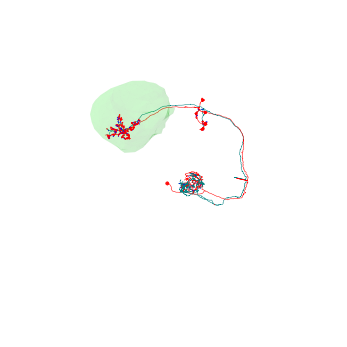

In [8]:
# Retrieve volume
lh = pymaid.get_volume('LH_R')
# Set color and alpha
lh['color'] = (0,1,0,.1)
# Plot
fig, ax = pymaid.plot2d([ nl ,lh ], method='3d_complex' )
plt.show()

In [ ]:
# Plot using Vispy (will open 3D window)
nl.plot3d()
# Save screenshot
pymaid.screenshot('screenshot.png', alpha = True)

In [ ]:
# Add another set of neurons to existing canvas
nl2 = pymaid.CatmaidNeuronList([987675,543210], remote_instance = rm)
nl2.plot3d()
# To clear canvas either pass parameter when plotting...
nl2.plot3d(clear3d=True)
# ... or call function to clear
pymaid.clear3d()
# To wipe canvas from memory
pymaid.close3d()

In [ ]:
# Fig is a dictionary that plotly turns into a WebGl file
from plotly import offline as poff
poff.init_notebook_mode(connected=True)

fig = nl.plot3d( backend = 'plotly', connectors = True, width=800 )

# Use .plot() to save as html file and open in separate tab/window or...
# poff.plot( fig, filename='3d_plot.html' )
# ... use .iplot() to embedd directly into Jupyter notebook instead
poff.iplot( fig )

In [ ]:
# Provide colors
vols = [ pymaid.get_volume('LH_R', color=(255,0,0,.2)),
         pymaid.get_volume('LH_L', color=(0,255,0,.2)) ]
fig = pymaid.plot3d( [ nl, *vols ], backend='plotly', width=800 )
poff.iplot(fig, filename='3d_volumes.html')

In [ ]:
cust_vol = pymaid.Volume( 
                          vertices = [ (1,2,1),(5,6,7),(8,6,4) ],
                          faces = [ (0,1,2) ],
                          name = 'custom volume',
                          color = (255,0,0)
                        )
fig = pymaid.plot3d( cust_vol, backend='plotly', width=800 )
poff.iplot(fig, filename='3d_custom.html')

In [ ]:
# Get some PNs
pns = pymaid.find_neurons(annotations='glomerulus DA1')
# Get their connectivity table
partners = pymaid.get_partners( pns )
# Get the 10 strongest downstream partners
top_partners = partners[ partners.relation == 'downstream'].iloc[:10]

all_skeleton_ids = list(pns.skeleton_id) + list(top_partners.skeleton_id)
fig = pymaid.plot_network( all_skeleton_ids, 
                           label_nodes=False, 
                           label_hover=False,
                           width=700,
                           height=700,                          
                           layout='circular_layout')
poff.iplot(fig, filename='network_plot.html')

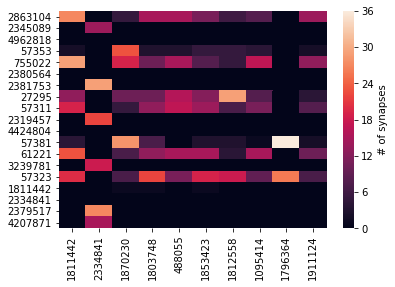

In [21]:
import seaborn as sns

adj_mat = pymaid.adjacency_matrix(pns, top_partners)

hm = sns.heatmap(adj_mat, cbar_kws=dict(label='# of synapses'))

plt.show()